# A Predictive DASH QoE Approach Based on Machine Learning at Multi-access Edge Computing

## Abstract

Network operators expected to run on with fastgrowing multimedia video streaming (Dynamic Adaptive Streaming over HTTP, aka MPEG-DASH, such as YouTube and Netflix) traffic demand while providing a high Quality of Experience (QoE) to the end-users. The cost, complexity, and scalability of existing QoE estimation solutions have significant limitations to infer QoE from network traffic. However, this works provides an end-user QoE estimation method based on a predictive passive QoE probe mechanism of DASH video using a Machine Learning
(ML) approach running at network edge nodes. This work
describes the design and implementation of probe configuration
at the target edge, with traffic flow monitoring to generate
network-level Quality of Service (QoS) metrics. Moreover, build
a QoS-QoE correlation ML model in a real-time fashion to
detect user equipment traffic patterns to predict user QoE more
specifically Mean Opinion Score (MOS).

Keywords— Quality of Experience (QoE), Quality of Service
(QoS), DASH, Machine Learning (ML), MEC


## Introductution

Over the past several years, multimedia traffic precisely MPEG-DASH video traffic becomes the most dominant application on the Internet.  According to a recent study and forecast,  global Internet video traffic accounted for 70\% of the total internet traffic in 2017 [1].  In 2021, it has expected to reach 82\% of the entire Internet traffic with immense video traffic growth rates.  Hence, it has become a critical issue for video content providers and network operators to manage such amount of video traffic demand and ensure that end-user perceived the best quality.  Both content providers and network operators want to provide a great experience to their end-users, known as Quality of Experience (QoE). End-users perceived experience might vary based on various factors, including user context, expectations, and needs.  All of the elements have a direct or indirect influence on QoE. 

To assess the QoE for any specific multimedia service, active users typically participate in contributing to subjective feedback (Mean Opinion Score) to evaluate the given service [2].  Contrarily,  objective methods used to determine objective  QoE from a  set of metrics to replicate the subjective assessment [3].  Nowadays, the QoE assessment paradigm approaches data-driven analysis [4], where the QoE prediction based on network-level Quality of Service (QoS) metrics through QoS to QoE mapping assessments.  Applying the  Machine Learning (ML) method shows the possibility to predict user-level QoE based on the network level QoS even for encrypted traffic [5][6]. 

Though content providers have direct access to video quality from the user end,  network operators only have access to network traffic for measuring quality.  The network traffic mainly collected and analyzed either from the user devices or network elements or both sides to monitor the network quality.  The collected data after that used to make QoE estimation/prediction solutions.  So-called probes used to capture this data.  Probes are monitoring mechanisms that are distributed in various parts of the service delivery chain and gather information about network matrices' performance.  

Since network operators have no access to encrypted traffic and assess QoE at the client-side, therefore, present client level QoE monitoring or network level passive monitoring by Deep Packet Inspection (DPI) is not workable for network operators. As an emerging QoE driven architecture, the Multi-access Edge Computing (MEC) [7] leverages the edge computing concept providing low latency and high bandwidth requirements at edge facilities. Beyond the content caching work at edge facilities [8] to optimize the video delivery, no study has conducted yet to estimate/predict QoE by a predictive passive probe running at network edge facilities to meet the immense demand for video traffic.


The aim of this work to proposes a  method to predict the QoE, more specifically Mean Opinion Score (MOS) (quantify as  1-bad,  2-poor,  3-average,  4-good, 5-excellent) of target end-users based on passive traffic monitoring at edge facilities near to the target user. We propose to deploy a predictive passive probe mechanism at an edge facility where edge acts as a  sink for the corresponding network QoS metrics  (e.g.,  throughput,  delay,  packets,  etc.)  of the end-users.  After that,  a  real-time fashion analysis based on the  QoS-QoE correlation  ML  model is used as an predict per video segment  QoE  (MOS) in contrast to QoS metrics. In the ML part, we evaluate well known supervised algorithms and select the best model. Such QoE prediction helps network operators correlate network traffic with video quality to overcome QoE degradation. 



## Background and Motivation

By providing excellent quality to meet the end user's satisfaction,  it is utmost necessary to monitor their satisfaction level from network operators' points.  The most common approach to measure user satisfaction relies on QoS metrics collected from the network. QoS defined in terms of some metrics such as bandwidth, delay, packet loss, etc.  Therefore, QoS metrics only describe the system's technical performance or service under consideration and leave out user perception and judgment. As a consequence, the concept of QoE developed as a user-centric reflection of QoS. QoE is a  user-perceived experience that may differ according to users' expectations and context. The QoE ecosystem influenced many factors that directly or indirectly affect the user reaction/perception for any service.  These influence factors are co-related to each other.
In most cases, application-level or objective QoE metrics such as video resolution, bit-rate,  and buffering/stall ratio have a strong and positive influence on user QoE.  QoS metrics directly affect application-level or objective QoE metrics, which later work as the most influential factor for changing user satisfaction or experience— the relation between network layer QoS and application layer or objective QoE shown in Figure 1. From the network operators' level, most of the influence factors are hardly measurable to predict user QoE, but monitoring network-level QoS metrics are viable. 


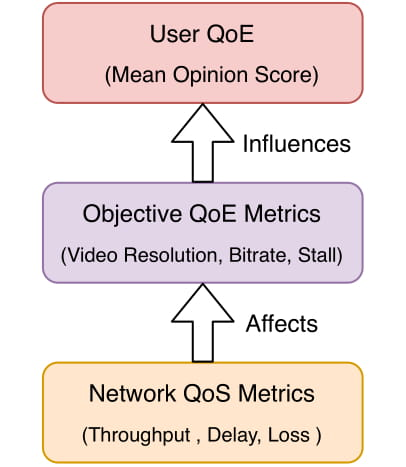

In [3]:
from IPython.display import Image
Image("../figures/qos-qoe.jpg")

                 Figure 1:  Relation Between QOS and QoE

Since recent QoE predictions have shifted to a data-driven approach, they rely on statistical/probabilistic and machine learning models; thus, this approach provides objective assessment techniques more ability to give accurate approximation or answer.  Machine learning techniques focus on building supervised learning models (1st phase) and making a prediction based on input (2nd phase).  At the 1st phase, model trains with QoS metrics and user feedback collecting by a passive monitoring agent named as a probe from the user and network side.  In the 2nd phase, predict user experience based on real-time QoS data collecting by a probe without altering the original network traffic based on the previously trained model. 

As stated, Dynamic Adaptive Streaming over HTTP (DASH) paradigm has been dominating internet traffic in recent years. DASH provides formats to enable the efficient and highest quality of streaming service over the Internet. DASH follows adaptive bitrate HTTP streaming standard [9]. Adaptive bitrate streaming is a combination of server and client software that detects a client's bandwidth capacity and adjusts the video stream's quality between multiple bitrates and resolutions. Figure 2, represents the scenario of adaptive streaming. It works by breaking the video media file into a sequence of small HTTP-based file segments. Each segment contains a short interval of playback time of a video with different encoding bitrates, video frame rates, video resolutions, etc. The structure of each video media file has described in a Media Presentation Description (MPD) file, an XML-compatible document. The client automatically decides which of the media segments should be downloaded and playback based on current network conditions as the video playback by a DASH client. The client selects the segment with the highest bit rate possible that can be downloaded in time for playback without causing stalls or re-buffering events in the playback. 

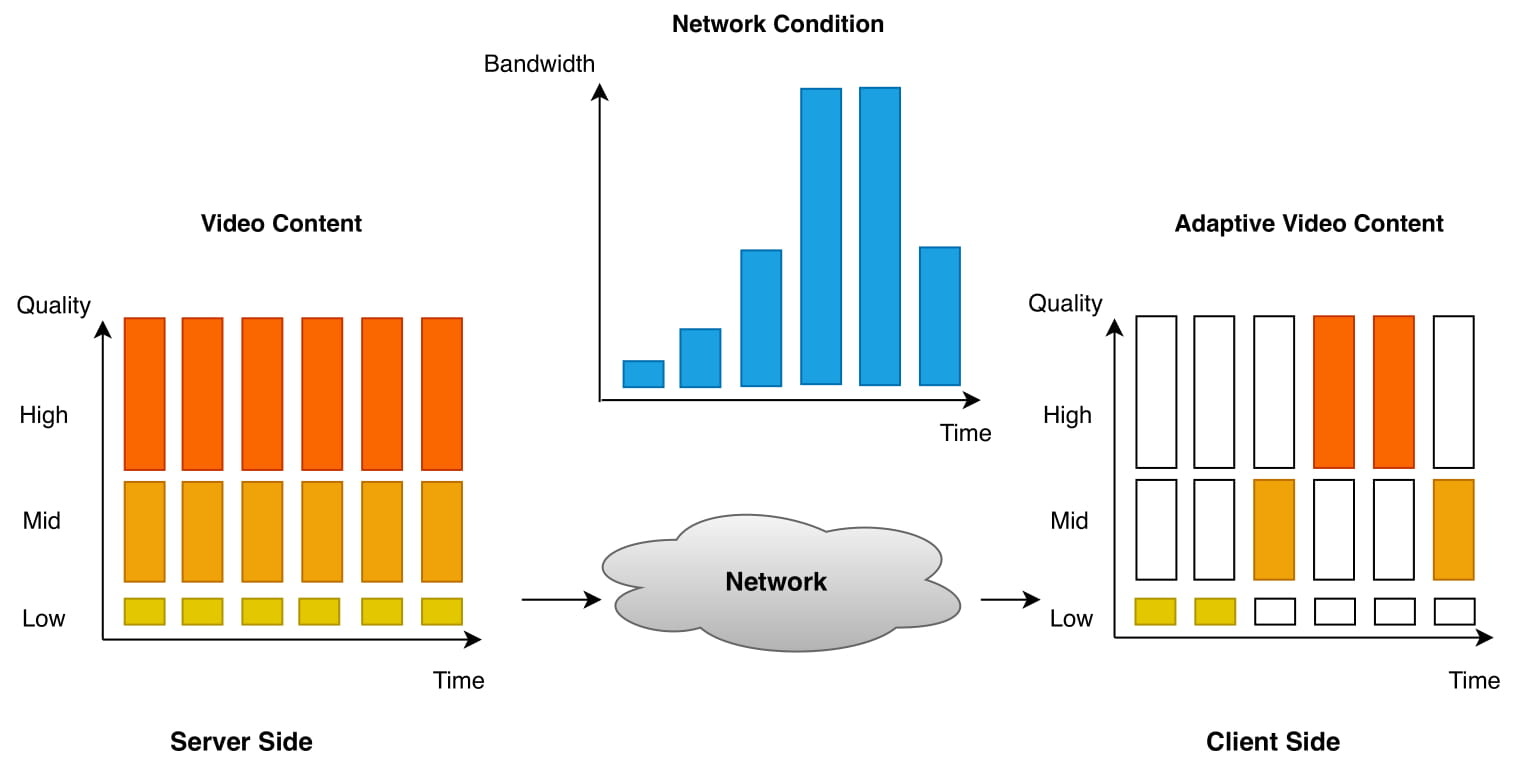

In [2]:
Image("../figures/dash-1.jpg")

                  Figure 2:  Dynamic Adaptive Streaming over HTTP

DASH clients are allowed to switch between different video qualities to improve the viewing experience, matching based on current network conditions.  Thus, there is a need to be aware of network conditions to optimize video delivery.  To optimize the video delivery and meet the user demand, a new technological standard edge computing arises.  It allows pushing applications, data,  and computing power to the edge of the network.  The ETSI promotes a Multi-access Edge Computing (MEC) [7] paradigm to implement the edge computing concept.  Our work will focus on network performance and QoE improvements  MEC use cases where an analytic MEC function will monitor the traffic information and provide real-time information on traffic requirements of the front/backhaul network.  Later,  this information passes to the cloud (e.g., cloud edge controller) for reshaping the traffic per application or re-routing traffic as required to improve the QoE.  For this purpose, we will propose to deploy a passive probe mechanism at the edge point to monitor the network traffic for inferring the user QoE. This works only to take into account how to predict QoE at the edge node, not about how the network takes adequate action to overcome the QoE degradation.

-

## Testbed Design and Implementation

### Data Generation

This work aims to propose a method based on the deployment of a predictive QoE probe mechanism to allow network operators to estimate users’ QoE at edge facilities without user cooperation and on path middle-box processing. The edge probe periodically collects the bi-direction network traffic (QoS) and predicts users QoE. Figure 3 illustrates the overall network scenario for the QoE estimator probe compound with end-user, access network, core network, internet, and video server. Besides, the access point will serve as the edge computing node use to run a network monitoring probe. Our testbed framework based on four components: (I) emulated network infrastructure with Mininet-WiF [10] i) tcpdump packet sniffer agent for passive QoS metrics monitoring at the access point (iii) goDASH [11] player to play DASHb video and generate QoE metrics log file as ground truth (iv) supervised ML model to predict QoE based on QoS features. 


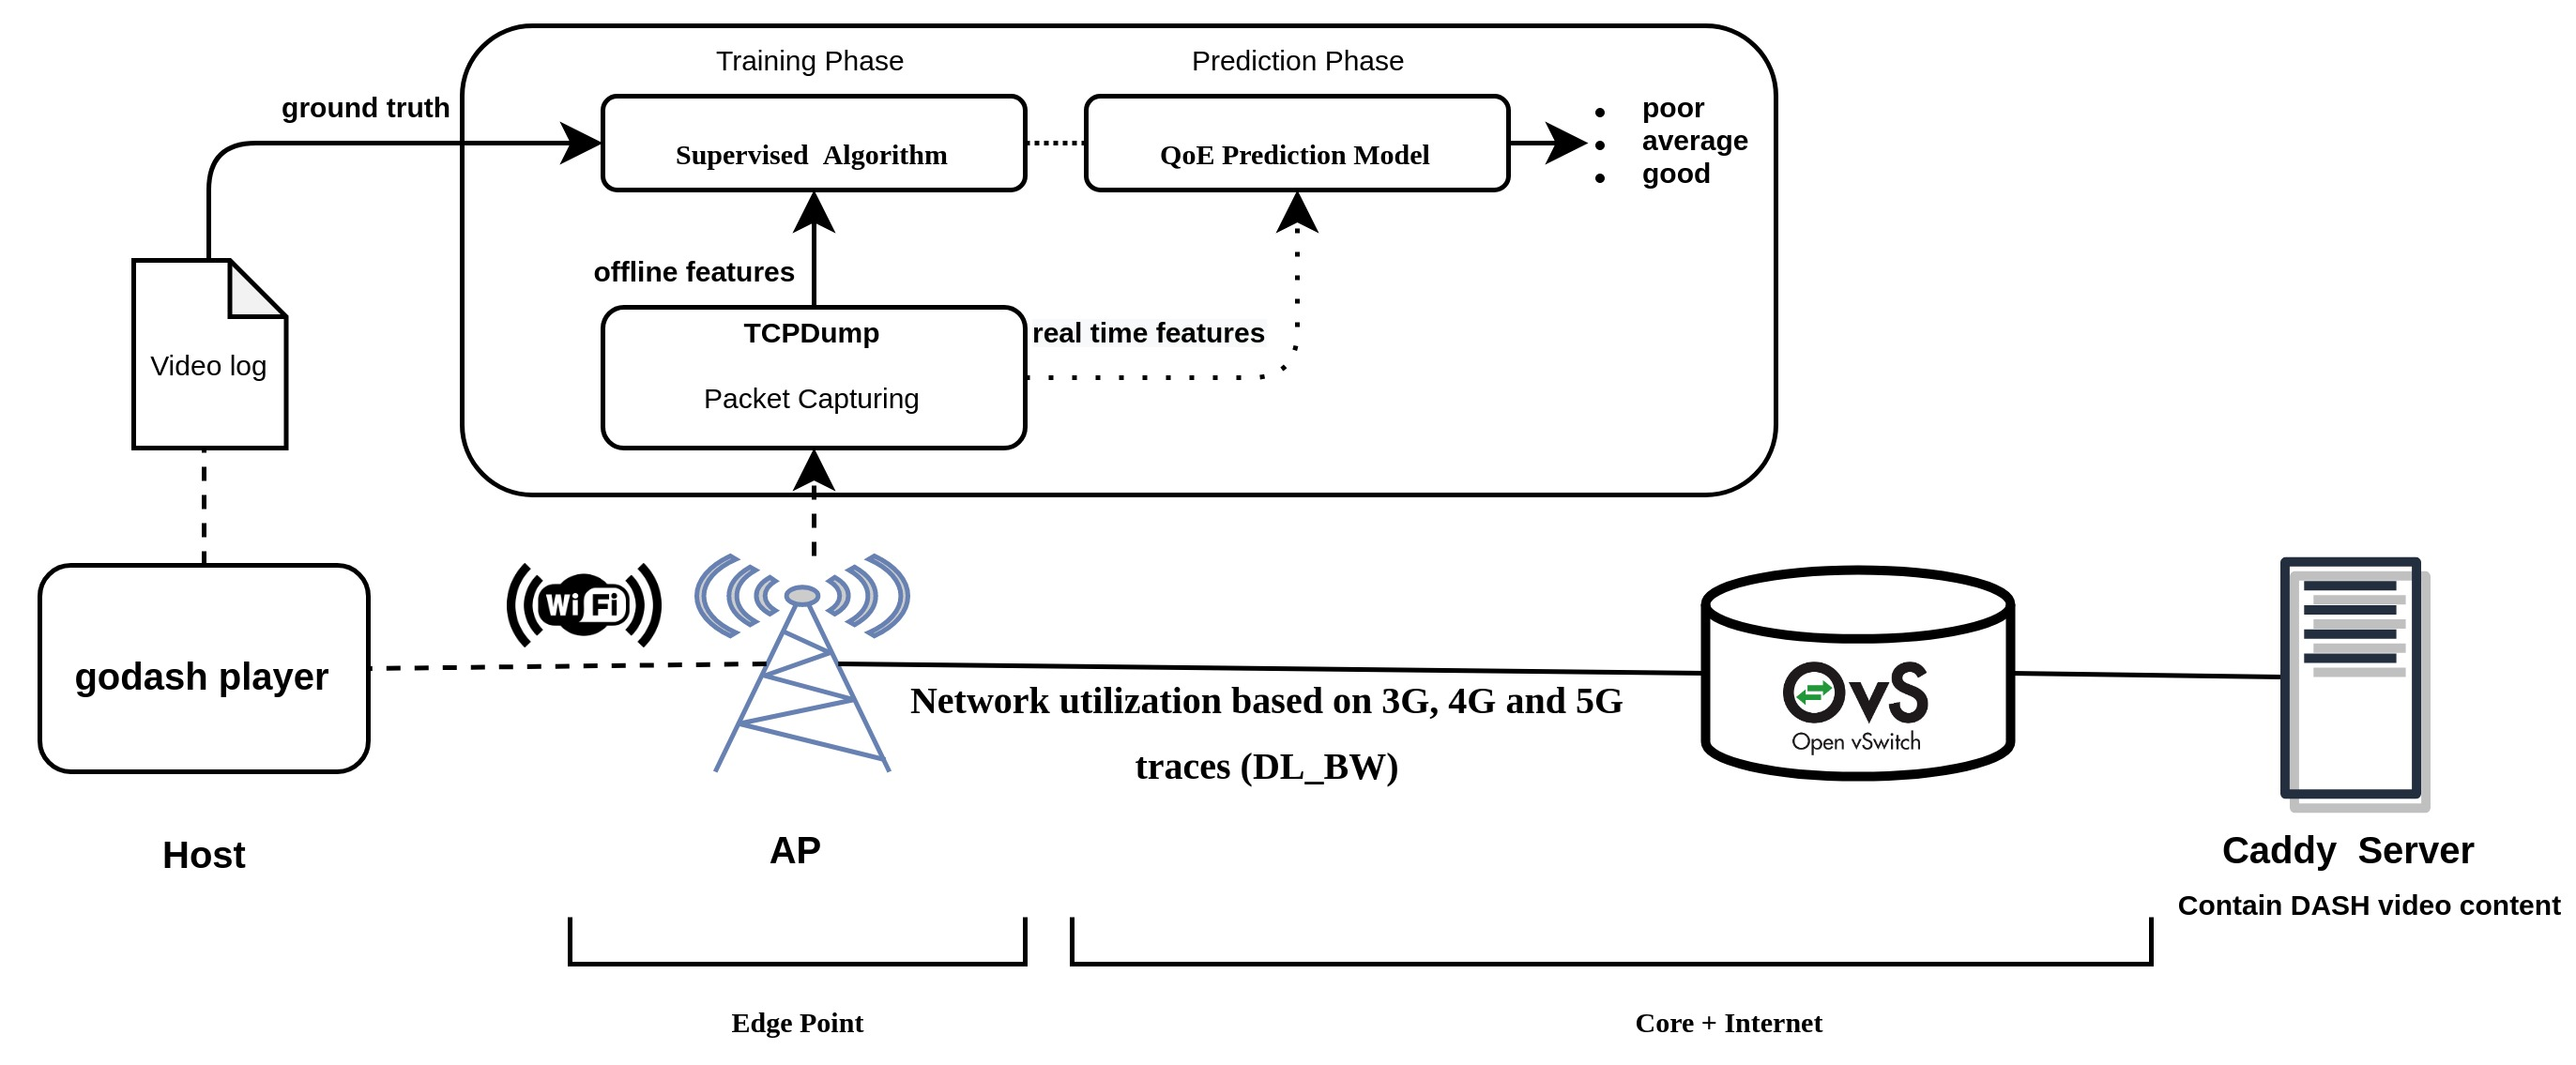

In [9]:
Image("../figures/testbed.jpg")

                         Figure 3:  Network Emulation Architecture

We used the network topology depicted in Figure 3 using Mininet-WiFi along with dynamic network conditions for the entire video session. The testbed consists of one client, a wireless access point (AP), an openvswitch (OVS), and a server. The client linked to access point by wireless and use goDASH player to stream DASH video content. On the other side, a Caddy web server host the animation video Big Buck Bunny(BBB) split into small segments (10-second duration) with different bitrates and resolutions linked with the OVS. The connection between the access point and OVS acts as a bottleneck. Different network conditions are emulated between AP and OVS links by Linux traffic control (TC) tools using downlink throughput parameters from collected 3G [12], 4G [13], and 5G [14] network traces in per the second interval. For each different network traces, the client uses a goDASH player to stream the same video (10 minutes duration) from the server by throughput based conventional adaptation algorithm. All possible network utilization information during the all streaming experiment are given in Table 1.

              Table 1: Network utilization during data generation

Technology    | No of traces | Mode                              | Host competing at a same time | Adaptive algorithm
------------- | ------------ | --------------------------------- | ---------------------------------- | ------------------
3G            | 15           |bus, metro, train ,ferry ,car      |    1                               | Conventional
4G            | 30           |static, car, bus, train, pedestrian|    1                               | Conventional
5G            | 9            |static , driving                   |    1                               | Conventional

-


While streaming video content testbed store the log file generated by goDASH player with adequate per segment QoE metrics (including stall, resolution, and ITU-T P.1203 MOS [15]. Per segment MOS calculated by ITU-T P.1203 [15] approach is based on corresponding per segment, bit rate, codec, duration, frame rate, and resolution. Simultaneously, testbed captured and stored the network traffic at an access point interface with tcpdump to extract network-level QoS metrics. Figure 4 illustrates the workflow of the entire work, along with pre-processing, analysis, and execute the work steps on generated data.

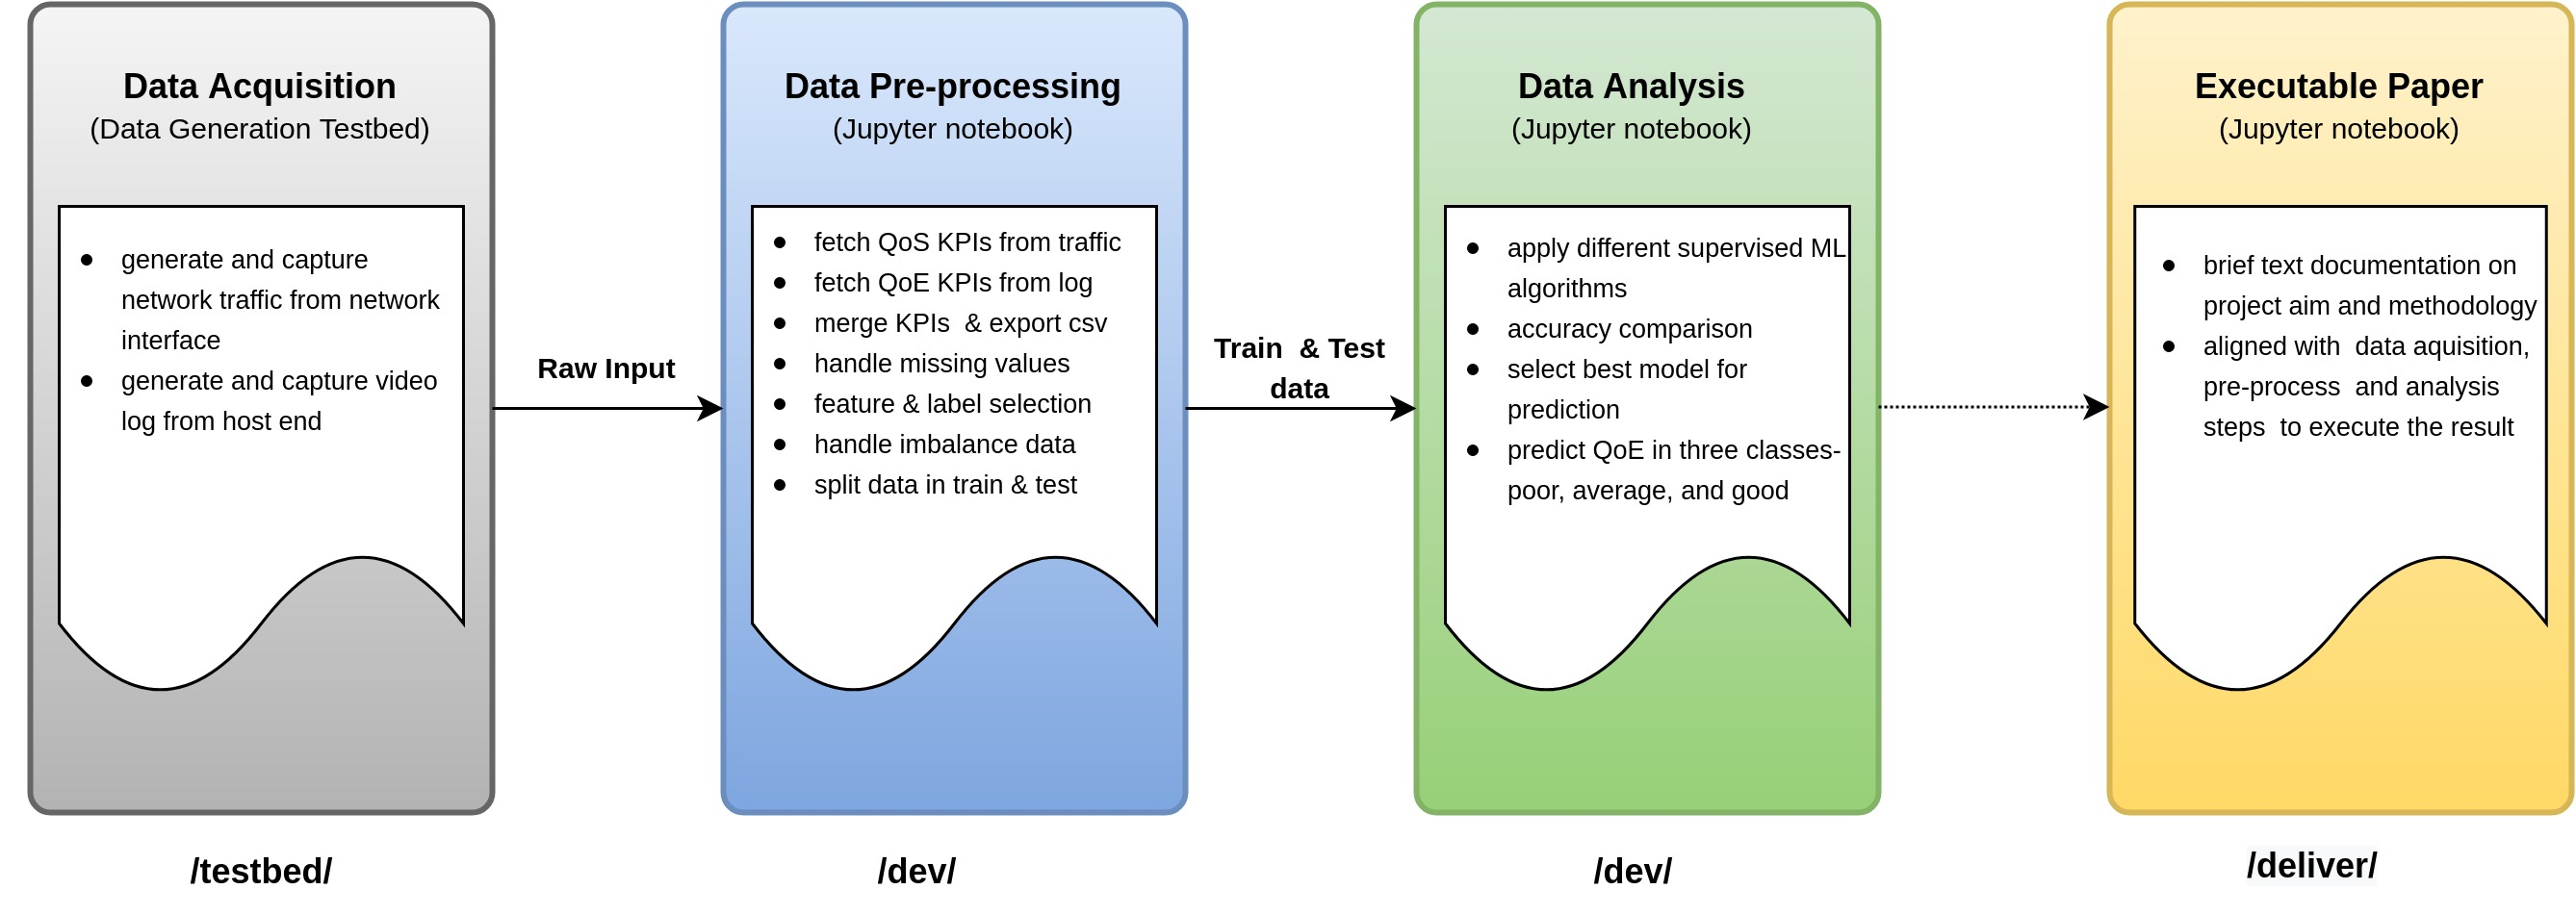

In [4]:
Image("../figures/Project workflow.jpg")

                                         Figure 4:  Workflow

###### NOTE: 

- To manually replicate the testbed, follow the instruction of the following link. [LINK](https://github.com/sajibtariq/reproducible-research-IA369Z/tree/master/testbed)

- But inside the provided pre-built VM you don't need to do anything to install testbed. Just follow the following steps to run the data generation script.



Step 1: Open your terminal

Step 2: Use following command in the terminal

     cd ~/reproducible-research-IA369Z/testbed
     
Step 3: Use following command in the terminal (Pass:dash)

     sudo python3 test_1.py
     
Step 4: Wait until complete the whole data generation script (will take approximately 6-8 hours)




###### WARNING: 
- Data generation Process will take a lot of time (approx 6 hours) to complete the raw data generate and store. You could skip these steps.  I have provided whatever raw data I collected and also pre-processed data.

-

## Data Preprocess



To build ML models that predict end-user perceived experience (MOS), more specifically, DASH video performance first, our generated data by testbed requires further processing to be in the form that is acceptable by supervised classification ML algorithms. For this purpose in this section, we present the steps taken to pre-process the captured network traffic and DASH video logged file. 
The goDASH client used in this work can only provide ground truth (target) of every video segment. Hence, we need to fetch per video segment QoS features form network traffic to build the QoS-QoE correlation model. We observed the pattern of each downloaded segment is persistent in captured network traffic. Each segment request is initiated by HTTP GET request and complete downloading packet of the corresponding request segment from sever until next segments' requests arise. Using this observation, we fetch per segment related QoS metrics (uplink RTT, downlink throughput, and packets), as shown in Figure 5.


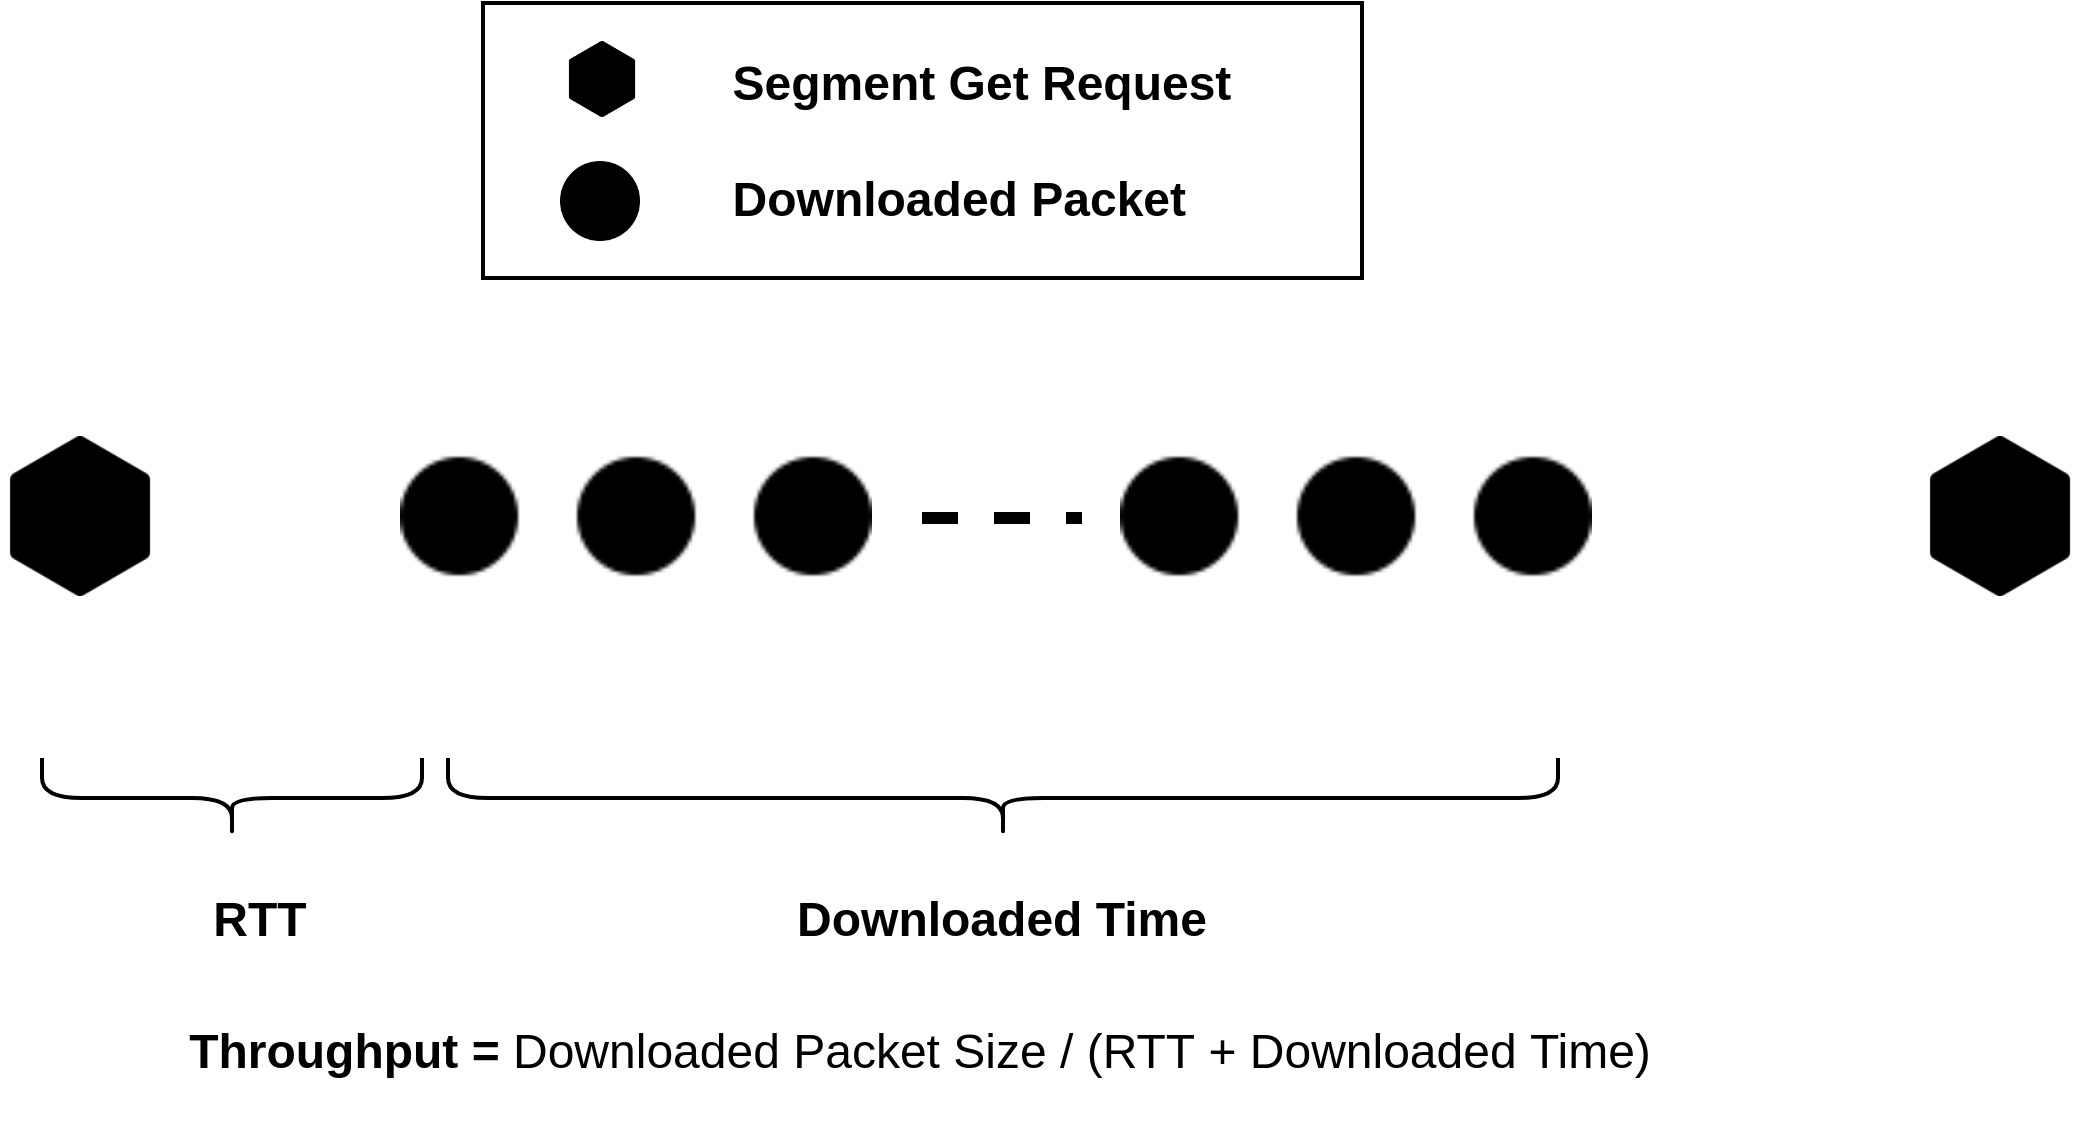

In [5]:
Image("../figures/segment.jpg")

                            Figure 5:  Segment QoS metrics


### Raw data preprocess and export CSV script

After capturing raw network traffic and video QoE, a python script implemented with the help of Scapy tools to fetch each video segment related QoS metrics (e,g, RTT, throughput, and packets) the stored pcap file. The script also aggregated fetched per segment QoS metrics from network traffic and MOS value from video QoE log and export as a single CSV file.

#### Oprtion 1 : if you have generated raw data by above steps (using testbed)

In [ ]:
%run ./Raw-data-preprocess-&-csv-export.ipynb

#### Oprtion 2 : If  you skipped the above data generation step and want to use my generated raw data

- To download the raw data go after with the following process:

step 1:  Open Terminal and use the following commands-

step 2:  wget  -r  'https://docs.google.com/uc?export=download&id=1nXeJTjX256fpOWZfFR3WgaJAru3ZayC5' -O ~/reproducible-research-IA369Z/testbed/experiment/expeiment.zip

step 3:  sudo unzip experiment.zip

step 4: sudo mv ~/reproducible-research-IA369Z/testbed/experiment/experiment/* ~/reproducible-research-IA369Z/testbed/experiment

- After downloading the raw data, run the subsequent cell:


In [ ]:
%run ./Raw-data-preprocess-&-csv-export.ipynb

-

The dataset used to make ML model includes both per segments QOS metrics as a feature and QoE metrics from video log file as ground truth. Video log file provides adequate information of each segment, including bit-rate, stall, resolution, and corresponding segment MOS values. For this work, only MOS values of each segment taken in to account to use a target to build ML models. To ease our classification problem MOS values categorized into three classes as follows:

- Class ”Poor” where MOS values between 1 and 2
- Class ”Average” where MOS values between 2 and 3
- Class ”Good” where MOS values between 3 and 5


To build the ML models, we have taken the following
steps: 
- Handle missing values by dropping the entire row
- Balance the number of samples per class by upsampling minority classes using SMOTE (Synthetic Minority Oversampling Technique) to avoid bias models.
- After balancing the classes, the dataset split into training and testing in 90% and 10% ratio.



### Load dataset, feature and target select, balance dataset, split into training and testing

- Run the subsequent cell to complete this step:

/home/dash/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/dash/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/dash/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and 

----------------------------------------

Entire dataset including all the metrics
----------------------------------------

  Type Mobility Operator  Trace  Total host  Client Algorithm   Port  Segment  \
0   3g    metro       Am    1.0           1       1      conv  58428        1   
1   3g    metro       Am    1.0           1       1      conv  58432        2   
2   3g    metro       Am    1.0           1       1      conv  58436        3   

      RTT    Throughput  Packets    MOS  Stall Duration  Rep_level  Byte Size  \
0   0.014  22659.514093      183  1.878               0        237     361713   
1  59.723   8985.608897      219  1.878               0        237     348932   
2   0.015  22692.006057      135  1.878               0        237     232527   

   Buffer level  Width  Height mos  
0         10000    320     180   1  
1         20000    320     180   1  
2         17928    320     180   1  


----------------------------------------

Dataset including only three feat

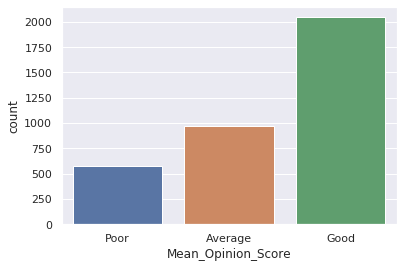



----------------------------------------

'RTT','Throughput','Packets' select as feature and 'mos' select as target for further analysis
----------------------------------------



----------------------------------------

Applied Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset
----------------------------------------

(6138, 3) (6138,)
Figure(432x288)


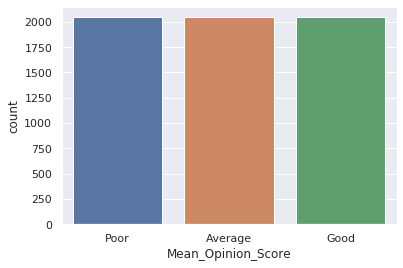



----------------------------------------

Splited dataset into traning and testing sets at the ratio of 90% : 10 %
----------------------------------------



In [1]:
%run ~/reproducible-research-IA369Z/dev/preprocess.ipynb

-

### Data Analysis 

We evaluated seven well known, supervised ML algorithms models, and select the best model with maximum cross-validation accuracy. To choose the best model, we split our dataset into 90% training and 10% testing dataset ratio. To train the model at first, we tune the hyper-parameters of each algorithm by grid search.  After tuning the hyper-parameters, a 5-fold cross-validation method used to compare the accuracy among different models.
During training each model, cross-validation uses on the training portion dataset. In 10-fold cross-validation, the training portion dataset is split into a 10 number of sections/folds where a portion of fold used as a validation set and the remaining part use as the training set. Thus, each of the models calculated accuracy five times and, lastly, computed average accuracy. . 

####  Model accuracy with grid search by tuning the best parameters

- The grid search process will take longer. Approximately more than 30-60 min. If you follow this process, you will get the same/close result with the main paper results. If you want to save your time, you may go with Model accuracy comparison without grid search by default parameters, but in this case, you will get the worst accuracy.

----------------------------------------
Best parameters for seven algorithms
----------------------------------------

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='depre

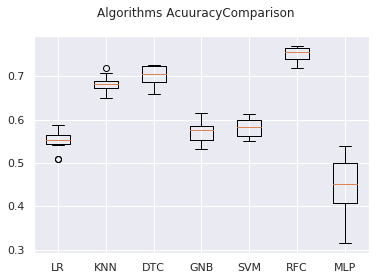

In [2]:
%run ~/reproducible-research-IA369Z/dev/model_accuracy_with_grid_search.ipynb

####  Model accuracy comparison without grid search by default parameters
 - In this case, you will get the worst accuracy and different results than the main paper result.

In [ ]:
%run ~/reproducible-research-IA369Z/dev/model_accuracy_without_grid_search.ipynb

We observed that the model built on Decision Tree Classifier
(DTC) and  Random Forest Classifier (RFC) obtained the highest accuracy, respectively 70% and 75%. Hence we opted for the RFC model as the final model. Later, we evaluated our train RFC model with the remaining test dataset, and it calculated test accuracy 74%, which is very close to cross-validation accuracy. 

#### Evaluate the selected RFC model on testdataset



------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.7471
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
               precision    recall  f1-score   support

   class Poor       0.78      0.79      0.78       204
class Average       0.71      0.66      0.68       210
   class Good       0.75      0.79      0.77       199

     accuracy                           0.75       613
    macro avg       0.75      0.75      0.75       613
 weighted avg       0.75      0.75      0.75       613


------------------------------------------------------
Confusion Matrix Result 

------------------------------------------------------
Confusion matrix without normalization
[[162  28  14]
 [ 34 139  37]
 [ 13  29 157]]
Normalized confusion matrix
[[0.79 0.14 0.07]
 [0.16 0.66 0.18]
 [0.07 0.

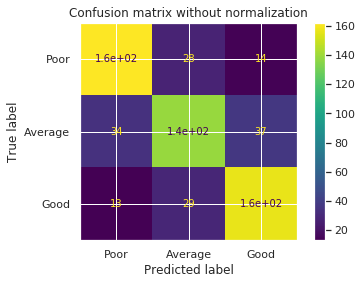

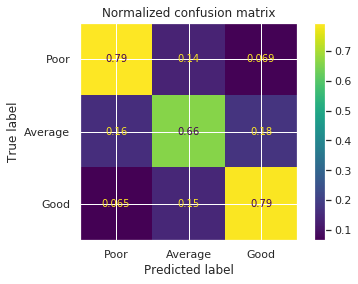

In [4]:
%run ~/reproducible-research-IA369Z/dev/rfc.ipynb

The classification report shows that precision, recall, and F1 score for "poor" and "good" class higher than "average"   class. Simultaneously, if we look at the confusion matrix, we observed that misclassification mostly occurs for "average" class.
Since measured test accuracy is close to cross-validation accuracy, we can conclude our trained model does not suffer from underfitting or overfitting.

# Conclusion

We presented the DASH video QoE prediction approach based on a supervised machine learning algorithm at the edge node in this work. We demonstrated our testbed setup to generate network traffic and capture at the edge interface. Random Forrest supervised model picked as the best model to predict per segment video QoE (MOS according to ITU-T P.1203) based on per segment network RTT,  throughput, and packet feature. In the real world, network operators can deploy such trained models to predict real-time QoE and take adequate action to optimize their services. Since network conditions and video quality adaptation logic changes over the time, network operator requires to collect new ground truth continuously, to evaluate the effectiveness of the existing model and retrain with new ground truth data if they are inaccurate. Our overall experimentation approach is reproducible to generate a new dataset or use the current dataset—the complete experimental information, including data and code available on [Github](https://github.com/sajibtariq/reproducible-research-IA369Z). As future work, it would be interesting to make a more robust anomaly detection and troubleshooting machine learning approach by constructing datasets based on per time slot ground truth and temporal network layer features.

# References

[1]  V.   Cisco,   “Cisco   visual   networking   index:   Forecast   and   trends,2017–2022,”White Paper,2018.

[2]  L. Skorin-Kapov, M. Varela, T. Hossfeld, and K.-T. Chen, “A survey ofemerging con-cepts and challenges for qoe management of multimediaservices,”ACM  Transactions  onMultimedia  Computing,  Communica-tions, and Applications, vol. 14, pp. 1–29, 05 2018.

[3]  Y. Chen, K. Wu, and Q. Zhang, “From qos to qoe: A tutorial on videoquality  assessment,”IEEE  Communications  Surveys  Tutorials,  vol.  17,pp. 1126–1165, Secondquarter 2015.

[4]  R. Huang, X. Wei, L. Zhou, C. Lv, H. Meng, and J. Jin, “A survey ofdata-driven  approachon  multimedia  qoe  evaluation,”Frontiers  of  Com-puter Science, vol. 12, 08 2018.

[5]  I.  Orsolic,  D.  Pevec,  M.  Suznjevic,  and  L.  Skorin-Kapov,  “Youtubeqoe estimation basedon the analysis of encrypted network traffic usingmachine  learning,”2016  IEEE  GlobecomWorkshops  (GC  Wkshps),  pp.1–6, 2016.

[6]  F. Bronzino, P. Schmitt, S. Ayoubi, N. Feamster, R. Teixeira, S. Wasser-man, and S. Sun-daresan, “Lightweight, general inference of streamingvideo  quality  from  encrypted  traffic,”arXiv  preprint  arXiv:1901.05800,2019.

[7]  Y.  C.  Hu,  M.  Patel,  D.  Sabella,  N.  Sprecher,  and  V.  Young,  “Mobileedge  computing—akey  technology  towards  5g,”ETSI  white  paper,  vol.11, no. 11, pp. 1–16, 2015.

8]  X.  Xu,  J.  Liu,  and  X.  Tao,  “Mobile  edge  computing  enhanced  adap-tive  bitrate  videodelivery  with  joint  cache  and  radio  resource  alloca-tion,”IEEE Access, vol. 5, pp. 16406–16415, 2017.

[9]  M.  Seufert,  S.  Egger,  M.  Slanina,  T.  Zinner,  T.  Hoßfeld,  and  P.  Tran-Gia, “A survey on quality of experience of http adaptive streaming,”IEEECommunications Surveys Tutorials, vol. 17, no. 1, pp. 469–492, 2014.

[10]  R. R. Fontes, S. Afzal, S. H. Brito, M. A. Santos, and C. E. Rothenberg,“Mininet-wifi:Emulating  software-defined  wireless  networks,”  in201511th  International  Conference  onNetwork  and  Service  Management(CNSM), pp. 384–389, IEEE, 2015.
[11]  D.  Raca,  M.  Manifacier,  and  J.J.  Quinlan.  goDASH  -  GO  acceleratedHAS framework for rapid prototyping. 12th International Conference onQuality of Multimedia Experience (QoMEX), Athlone, Ireland. 26th to28th May, 2020.

[12]  H. Riiser, P. Vigmostad, C. Griwodz, and P. Halvorsen, “Commute PathBandwidth  Traces  from  3G  Networks:  Analysis  and  Applications,”  inProceedings of the 4th ACM Multimedia Systems Conference.

[13]  D.  Raca,  J.  J.  Quinlan,  A.  H.  Zahran,  and  C.  J.  Sreenan,  “BeyondThroughput:  A  4G  LTE  Dataset  with  Channel  and  Context  Metrics,”in Proceedings of the 9th ACM Multimedia Systems Conference.

[14]  D. Raca, D. Leahy, C.J. Sreenan and J.J. Quinlan. Beyond Throughput,The Next Generation: A 5G Dataset with Channel and Context Metrics.ACM Multimedia Systems Conference (MMSys), Istanbul, Turkey. June8-11, 2020.

[15]  Raake,  M.-N.  Garcia,  W.  Robitza,  P.  List,  S.  G  oring,  and  B.  Feiten,“A   bitstream-based,   scalable   video-quality   model   for   http   adaptivestreaming:  Itu-t  p.  1203.1,”  in2017Ninth  International  Conference  onQuality of Multimedia Experience (QoMEX), pp. 1–6,IEEE, 2017.

###  Great work!